In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [10]:
from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select
from SQLalch_helpers import selectPlayerIDsSubQ
from SQLalch_helpers import selectSessionsDataScatter



engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

In [11]:
from SQLalch_helpers import selectPlayerIDsSubQ
from SQLalch_helpers import selectSessionsDataScatter

# get player positions
positions = []

with engine.connect() as conn: 
    
    pos_stm = (
        select(players_table.c.position)
        .group_by(players_table.c.position)
    )

    positions = conn.execute(pos_stm).scalars().all() 



In [12]:

with engine.connect() as conn:
    select_stm_all_data = (
        select(sessions_data_table.c.Distance, sessions_data_table.c.HSR)
    )

    result_all = conn.execute(select_stm_all_data)
    all_data = result_all.mappings().all()

# getting some x and y values as np arrays
all_df = pd.DataFrame(all_data)
x = all_df["Distance"].values
y = all_df["HSR"].values

# get coefficients of data the minimizeses SSE of points for given polynomial (1 in this case)
coefficients = np.polynomial.polynomial.Polynomial.fit(x, y, 1) # here we ask for a function of for f(x) = mx + c
coefficients

# poly is a object of poly1d class, inited with the coeffeicients of the polyfit function. A 1d array of values will now return 
# the result of the function defined above



print(coefficients)


# For our figures, we want every line of best fit to share m, while having a unique x
# To do this, we must calulate the overall m, then calculate indivual group c, combine them into one polynomial, and then plot

518.66609479 + 397.98429815 (-3.13601115 + 0.00031332x)


[1. 2. 3.]
-624.86153981 + 0.12469547 x
-912.10848229 + 0.12469547 x
-1048.60694083 + 0.12469547 x
-555.78425739 + 0.12469547 x


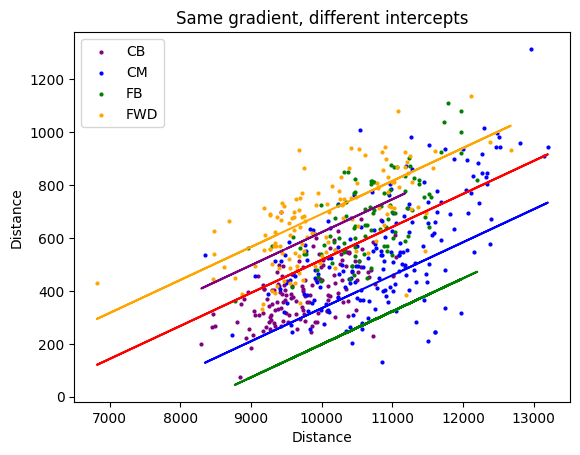

In [ ]:
# plotting each position with same gradient, different intercepts

# get positional data for all players

with engine.connect() as conn:
    select_stm_all_data = (
        select(sessions_data_table.c.Distance, sessions_data_table.c.HSR)
    )

    result_all = conn.execute(select_stm_all_data)
    all_data = result_all.mappings().all()

all_df = pd.DataFrame(all_data)
x_vals_all = all_df["Distance"].values
y_vals_all = all_df["HSR"].values
poly_all = np.polynomial.polynomial.Polynomial.fit(x_vals_all, y_vals_all, 1)
poly_test = np.polynomial.polynomial.Polynomial((1, 2, 3))

print(poly_test.convert().coef)

M_all = poly_all.convert().coef[1]



colours = ["purple", "blue", "green", "orange"]

for i, position in enumerate(positions):
    pos_subQ = selectPlayerIDsSubQ(position, players_table)
    measure_columns = sessions_data_table.columns
    pos_data = selectSessionsDataScatter(pos_subQ, measure_columns, sessions_data_table)
    pos_df = pd.DataFrame(pos_data)
    x_df_pos = pos_df["Distance"]
    y_df_pos = pos_df["HSR"]

    poly_pos = np.polynomial.polynomial.Polynomial.fit(x_df_pos.values, y_df_pos.values, 1)
    C_pos = poly_pos.convert().coef[0]

    # same gradient different intercept
    poly_sgdi_pos = np.polynomial.polynomial.Polynomial((C_pos, M_all))

    print(poly_sgdi_pos)

    plt.scatter(x_df_pos, y_df_pos, color=colours[i], label = positions[i], s=4)
    plt.plot(x_df_pos.values, poly_sgdi_pos(x_df_pos.values), color=colours[i])
    

plt.legend()
plt.plot(x_vals_all, poly_all(x_vals_all), color="red")
plt.title("Same gradient, different intercepts")
plt.xlabel(x_df_pos.name)
plt.ylabel(y_df_pos.name)
plt.show()

[1. 2. 3.]
-624.86153981 + 0.12469547 x


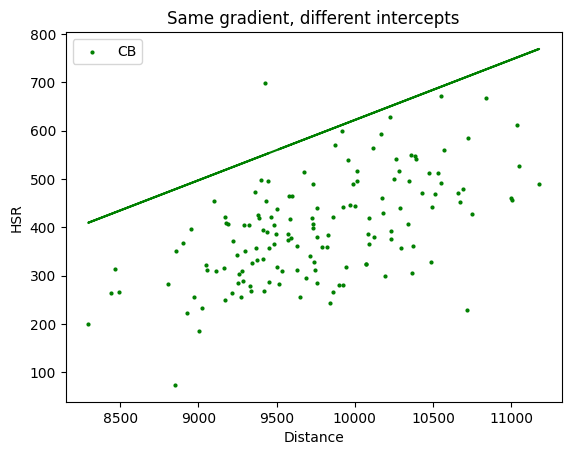

In [70]:
# plotting each position with same gradient, different intercepts

# get positional data for all players

with engine.connect() as conn:
    select_stm_all_data = (
        select(sessions_data_table.c.Distance, sessions_data_table.c.HSR)
    )

    result_all = conn.execute(select_stm_all_data)
    all_data = result_all.mappings().all()

all_df = pd.DataFrame(all_data)
x_vals_all = all_df["Distance"].values
y_vals_all = all_df["HSR"].values
poly_all = np.polynomial.polynomial.Polynomial.fit(x_vals_all, y_vals_all, 1)
poly_test = np.polynomial.polynomial.Polynomial((1, 2, 3))

print(poly_test.convert().coef)

M_all = poly_all.convert().coef[1]



colours = ["purple", "blue", "green", "orange"]


pos_subQ = selectPlayerIDsSubQ("CB", players_table)
measure_columns = sessions_data_table.columns
pos_data = selectSessionsDataScatter(pos_subQ, measure_columns, sessions_data_table)
pos_df = pd.DataFrame(pos_data)
x_df_pos = pos_df["Distance"]
y_df_pos = pos_df["HSR"]

poly_pos = np.polynomial.polynomial.Polynomial.fit(x_df_pos.values, y_df_pos.values, 1)
C_pos = poly_pos.convert().coef[0]

# same gradient different intercept
poly_sgdi_pos = np.polynomial.polynomial.Polynomial((C_pos, M_all))

print(poly_sgdi_pos)

plt.scatter(x_df_pos, y_df_pos, color="green", label = "CB", s=4)
plt.plot(x_df_pos.values, poly_sgdi_pos(x_df_pos.values), color="green")
    

plt.legend()
plt.title("Same gradient, different intercepts")
plt.xlabel(x_df_pos.name)
plt.ylabel(y_df_pos.name)
plt.show()